## **1부 도커(Docker)**

### **01. 도커란?**
---

도커(Docker)는 리눅스 컨테이너에 여러 기능을 추가함으로써 애플리케이션을 컨테이너로서 좀 더 쉽게 사용할 수 있게 만들어진 프로젝트이다.
도커는 Go 언어로 작성돼 있으며, 2013년 3월에 첫 번째 릴리스가 발표된 이후 지금까지 꾸준히 개발되고 잇다.
기존에 쓰이던 가상화 방법인 가상 머신과 달리 컨테이너는 성능의 손실이 거의 없어서 차세대 클라우드 인프라 솔루션으로 많은 개발자들에게 주목받고 있다.

도커와 관련된 프로젝트는 도커 컴포즈(Docker Compose), 레지스트리(Private Registry), 도커 허브(Docker Hub), Docker for Desktop 등 여러 가지가 있지만 일반적으로 도거라고 하면 도거 엔진(Docker Engine) 혹은 도커에 관련된 모든 프로젝트를 말한다.
보통 도커 엔진이라는 의미로 더 많이 쓰이는데 도커 엔진은 컨테이너를 생성하고 관리하는 주체로서 이 자체로도 컨테이너를 제어할 수 있고 다양한 기능을 제공하는 도커의 주 프로젝트이기 때문이다.

도커의 생태계에 있는 여러 프로젝트들은 도커 엔진을 좀 더 효율적으로 사용하기 위한 것에 불과하기 때문에 핵심이 되는 것은 도커 엔진이다.
이 때문에 도커 엔진을 사용하는 방법을 익히는 것은 도커와 관련된 모든 프로젝트를 능숙하게 다루기 위한 시발점이라고 봐도 무방하다.
이번 장에서는 도커 컨테이너를 다루기 위한 가장 기본적인 프로젝트인 도커 엔진을 사용하는 방법을 다루겠다.

#### **1.1. 가상 머신과 도커 컨테이너**

기존의 가상화 기술은 하이퍼바이저를 이용해 여러 개의 운영체제를 하나의 호스트에서 생성해 사용하는 방식이었다.
이러한 여러 개의 운영체제는 가상 머신이라는 단위로 구별되고, 각 가상 머신에는 우분투(Ubuntu), CentOS 등의 운영체제가 설치되어 사용된다.
하이퍼바이저에 의해 생성되고 관리되는 운영체제는 게스트 운영체제(Guest OS)라고 하며, 각 게스트 운영체제는 다른 게스트 운영체제와는 완전히 독립된 공간과 시스템 자원을 할당받아 사용한다.
이러한 가상화 방식을 사용할 수 있는 대표젹인 툴로 VirtualBox, VMware 등이 있다.

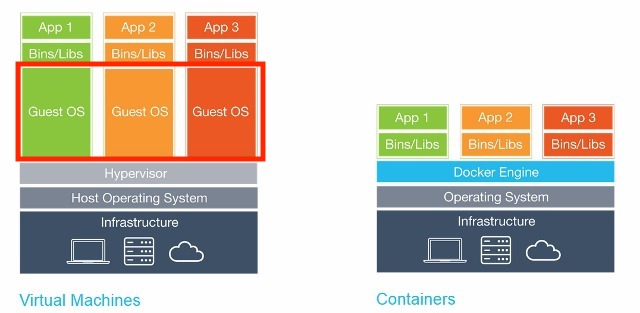

그러나 각종 시스템 자원을 가상화하고 독립된 공간을 생성하는 작업은 하이퍼바이저를 반드시 거치기 때문에 일반 호스트에 비해 성능의 손실이 발생한다.
그뿐만 아니라 가상 머신은 게스트 운영체제를 사용하기 위한 라이브러리, 커널 등을 전부 포함하기 때문에 가상 머신을 배포하기 위한 이미지로 만들었을 때 이미지의 크기 또한 커진다.
즉, 가상 머신은 완벽한 운영체제를 생성할 수 있다는 장점은 있지만 일반 호스트에 비해 성능 손실이 있으며, 수 기가바이트에 달하는 가상 머신 이미지를 애플리케이션으로 배포하기는 부담스럽다는 단점이 있다.

이에 비해 도커 컨테이너는 가상화된 공간을 생성하기 위해 리눅스의 자체 기능인 chroot, 네임스페이스(namespace), cgroup을 사용함으로써 프로세스 단위의 격리 환경을 만들기 때문에 성능 손실이 거의 없다.
컨테이너에 필요한 커널은 호스트의 커널을 공유해 사용하고, 컨테이너 안에는 애플리케이션을 구동하는 데 필요한 라이브러리 및 실행 파일만 존재하기 때문에 컨테이너를 이미지로 만들어 배포하는 시간이 가상 머신에 비해 빠르며, 가상화된 공간을 사용할 때의 성능 손실도 거의 없다는 장점이 있다.

#### **1.2. 도커를 시작해야 하는 이유**

컨테이너는 OpenVZ, LXC, cri-o 등 몇 가지가 존재하지만, 특히 그중에서도 도커는 컨테이너 생태계에서 사실상 표준으로서 사용되고 있다.
따라서 쿠버네티스, 메소스와 같은 오픈소스 프로젝트에서도 도커를 기준으로 개발되고 있으며 이에 발맞춰 점점 더 많은 회사들이 서비스 개발 및 운영 환경에 도커 컨테이너를 도입하고 있다.
그렇다면 왜 그렇게 많은 회사와 프로젝트가 도커를 선택했는지, 왜 도커를 시작해야 했는지에 대해 먼저 이야기해보도록 하겠다.

#### **1.2.1. 애플리케이션의 개발과 배포가 편해진다.**

서버를 부팅할 때 실행되는 운영체제를 일반적으로 '호스트 OS'라고 부르며, 도커 컨테이너는 호스트 OS 위에서 실행되는 격리된 공간이다.
따라서 컨테이너 자체에 특별한 권한을 주지 않는 한, 우리가 컨테이너 내부에서 수많은 소프트웨어를 설치하고 설정 파일을 수정해도 호스트 OS에는 영향을 끼치지 않는다. 즉, 우리만의 독립된 개발 환경을 보장받을 수 있다는 것이다.

우리가 컨테이너 내부에서 여러 작업을 마친 뒤 이를 운영 환경에 배포하려고 한다면, 해당 컨테이너를 '도커 이미지'라고 하는 일종의 패키지로 만들어 운영 서버에 전달하기만 하면 된다.
컨테이너에서 사용되던 패키지를 운영 서버에서 새롭게 설치할 필요도 없으며 각종 라이브러리 설칭 등으로 인한 의존성을 걱정할 필요도 없다.
서비스를 개발했을 때 사용했던 환경을 다른 서버에서도 컨테이너로 똑같이 복제할 수 있기 때문에 개발/운영 환경의 통합이 가능해진다.

게다가 도커 이미지는 가상 머신의 이미지와 달리 커널을 포함하고 있지 않기 때문에 이미지 크기가 그다지 크지 않다.
또한 도커는 이미지 내용을 레이어 단위로 구성하며, 중복되는 레이어를 재사용할 수 있어서 애플리케이션의 배포 속도가 매우 빨라진다는 장점이 있다.

#### **1.2.2. 여러 애플리케이션의 독립성과 확장성이 높아진다.**

소프트웨어의 여러 모듈이 상호 작용하는 로직을 하나의 프로그램 내에서 구동시키는 방식을 모놀리스(Monolith) 애플리케이션이라고 한다.
소규모 서비스에서는 이 방식이 어울릴지도 모르지만, 서비스의 기능이 복잡해지고 거대해질수록 소프트웨어 자체의 확장성과 유연성이 줄어든다는 단점이 있다.
이러한 모놀리스 방식을 대체하기 위해 최근 새롭게 떠오른 개념이 바로 마이크로 서비스(MicroServices) 구조이다.

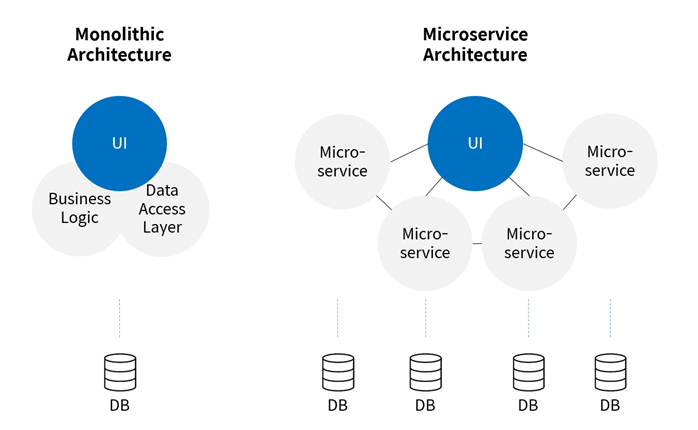

마이크로서비스 구조는 여러 모듈을 독립된 형태로 구성하기 때문에 언어에 종속되지 않고 변화에 빠르게 대응할 수 있으며, 각 모듈의 관리가 쉬워진다는 장점이 있다.
컨테이너는 수 초 내로 생성, 시작이 가능해질 뿐만 아니라 여러 모듈에게 독립된 환경을 제공할 수 있기 때문에 마이크로서비스 구조에서 가장 많이 사용되고 있는 가상화 기술이다.

예컨대 웹 서비스는 데이터베이스 컨테이너와 웹 서버 컨테이너로 분리할 수 있고, 웹 서비스에 부하가 발생할 시 마이크로서비스 구조의 웹 서버 컨테이너만을 동적으로 늘려서 부하를 분산할 수도 있다.
또한 웹 서버와 데이터베이스의 이미지 버전을 독립적으로 관리하기 때문에 유지 보수도 용이해진다.
이와 같은 컨테이너 기반의 마이크로서비스는 개발자가 그 구조를 직접 구현하기보다는 도커 스웜 모드, 쿠버네티스 등의 컨테이너 오케스트레이션 플랫폼을 통해 사용하는 것이 일반적이다.

이 외에도 도커 컨테이너를 사용하는 이유는 프로젝트 자체의 성숙도나 확장성, 편의성 등이 있지만, 이를 이해하기 위해서는 도커를 직접 사용해보는 것이 가장 좋다.
다음 절에서는 도커 컨테이너를 사용하기 위해 반드시 필요한 도커 엔진을 설치하는 방법에 대해서 알아본다.

#### **1.3. 도커 엔진 설치**

도커는 다양한 운영체제에서 사용할 수 있다.
도커는 리눅스 컨테이너를 제어하는 API를 Go 언어로 구현한 libcontainer를 사용하기 때문에 대부분의 리눅스 운영체제에서 사용할 수 있다.
도커를 사용할 때 쓰는 대표적인 리눅스 운영체제로는 CentOS, 우분투 등이 있다.
어느 운영체제를 선택하든 상관없지만 가능하다면 지원이 중단되지 않은 최신 버전의 운영체제 배포판을 사용하는것이 좋다.
마이크로소프트 윈도우, 맥 OS X 에서도 도커를 사용할 수 있지만 윈도우 10, 맥 OS X 10.10.3 Yosemite 이전 버전의 운영체제를 사용한다면 도커를 사용하기 위해 가상화 공간을 별도로 생성해야 한다.
그러나 도커가 어느 운영체제에 설치되든 사용법은 거의 같다.
이어지는 절에서 윈도우에서 도커를 설치하는 방법과 설치 방법의 구조적 특징에 대해 알아보겠다.

#### **1.3.1. 도커 엔진의 종류 및 버전**

2017년 이전의 도커 엔진은 1.12와 같이 1.x 버전으로 표기되어 왔다.
그러나 도커 엔진은 1.13을 마지막으로, 2017년 3월부터 도커 엔진은 도커 EE(Doker Enterprise Edition)와 도커 CE(Community Edition)으로 구분되어 제공되고 있으며, 버전 이름 또한 17.03-EE 또는 17.03-CE와 같이 (출시 년도)-(출시 월)-(도커 엔진 종류)의 형태로 변경되었다.

도커 EE는 유료로 제공되는 기업용 솔루션이며, 각종 기술 지원 및 실제 서비스 단계에서 필요한 각종 부가 기능들을 도커 엔진과 함께 제공한다.
도커 CE는 무료로 제공되는 도커 엔진으로서, 별도의 기술 지원 및 서비스를 제공하지는 않지만 도커 엔진자체의 핵심적인 기능을 무료로 사용할 수 있다는 장점이 있다.
또한 도커 EE는 3개월마다 안정화된 버전으로 릴리스되는 반면 도커 CE는 stable과 edge 버전으로 구분해 각각 3개월, 1개월 단위로 릴리스된다는 차이점도 있다.

도커 EE와 도커 CE는 기술 지원 및 서비스 운용을 위한 부가적인 서비스 지원 수준에서 차이가 있지만, 핵심적인 컨테이너 기술은 도커 CE에서도 동일하게 사용할 수 있기 때문에 앞으로 다룰 내용은 도커 CE를 기준으로 설명한다.
또한 1개월마다 릴리스되는 도커 CE의 edge 버전은 새로운 기능을 먼저 사용해 볼 수 있다는 장점이 있지만 각종 버그가 발생할 수 있기 때문에 도커 CE의 stable 버전을 사용하는 것을 권장한다.